In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def getBrownian(dt = 0.01, num = 10000):
    list_brownian = []
    list_brownian_x = []
    list_brownian.append(0)
    list_brownian_x.append(0)
    for i in range(1, num):
        r = np.random.normal(0, np.sqrt(dt))
        print("r = ", r)
        list_brownian.append(r + list_brownian[i-1])
        list_brownian_x.append(dt + list_brownian_x[i-1])
    return(list_brownian_x, list_brownian)

In [3]:
def getGBM(dt = 0.01, num = 100, alpha = 0.0,  volatility = 0.01, S0 = 1):
    list_gbm_y = []
    list_gbm_y.append(S0)
    for i in range(1, num):
        r = np.random.normal(0, 1)
        S = list_gbm_y[i-1]
        dS = alpha*S*dt + volatility*S*r*np.sqrt(dt)
        list_gbm_y.append(S + dS)
    return(np.linspace(0.0, dt*(num-1), num), list_gbm_y)

In [4]:
list_gbm_x, list_gbm_y = getGBM(dt = 0.01, num = 10000, alpha = 0.0,  volatility = 0.25, S0 = 2)

In [5]:
stock_data = pd.read_csv("BANDHANBNK.csv")
stock_data.head(2)

,Date,Open,High,Low,Close,Volume
0,2020-01-01,509.074605,510.021409,499.30772,501.300964,5.220273e+05
1,2020-01-02,501.251154,501.251154,493.57715,497.314484,1.841966e+06


In [6]:
stock_data = stock_data.set_index("Date")
stock_data = stock_data.drop(["Volume"], axis=1)
stock_data.head(2)

,Open,High,Low,Close
Date,,,,
2020-01-01,509.074605,510.021409,499.30772,501.300964
2020-01-02,501.251154,501.251154,493.57715,497.314484


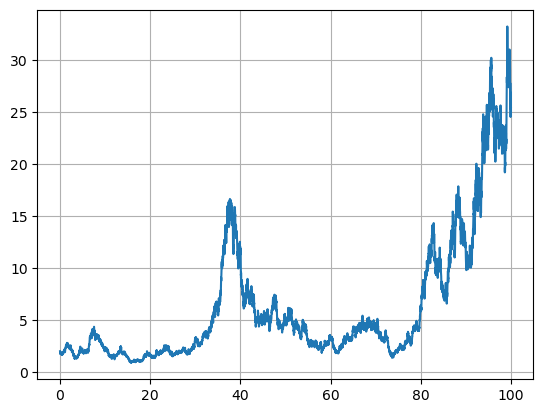

In [7]:
plt.plot(list_gbm_x, list_gbm_y)
plt.grid()

In [8]:
def sma(data, window=20):
    sma = data.rolling(window = window).mean()
    return sma

ClosingPriceSeries = pd.Series(list_gbm_y)
sma_closingPrice = sma(ClosingPriceSeries)
sma_closingPrice.tail(30)

9970    29.779220
9971    29.838959
9972    29.904266
9973    30.020267
9974    30.072749
9975    30.105804
9976    30.161454
9977    30.174393
9978    30.149828
9979    30.079162
9980    29.896943
9981    29.802257
9982    29.625370
9983    29.426839
9984    29.278666
9985    29.091321
9986    28.885395
9987    28.640432
9988    28.467283
9989    28.356037
9990    28.202480
9991    27.944337
9992    27.718374
9993    27.430211
9994    27.204712
9995    26.984750
9996    26.823048
9997    26.577617
9998    26.377698
9999    26.194000
dtype: float64

In [9]:
def bb(data, sma, window=20):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

In [10]:
upper_bb, lower_bb = bb(ClosingPriceSeries, sma_closingPrice)

In [11]:
ClosingPriceSeries

0        2.000000
1        1.975430
2        1.890284
3        1.834267
4        1.822787
          ...    
9995    25.712797
9996    26.141853
9997    25.248690
9998    25.371437
9999    25.337190
Length: 10000, dtype: float64

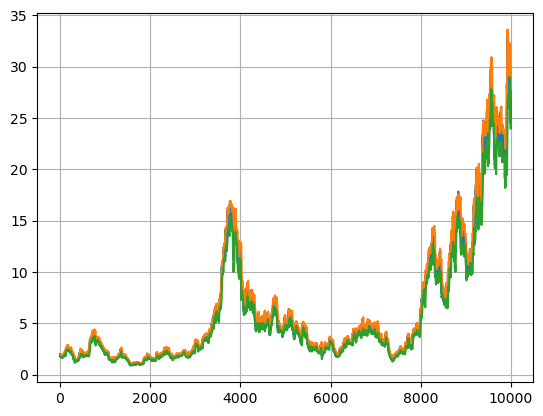

In [12]:
plt.plot(ClosingPriceSeries)
plt.plot(upper_bb)
plt.plot(lower_bb)
plt.plot()
plt.grid()

In [13]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal) 
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

In [14]:
#len(ClosingPriceSeries), len(lower_bb), len(upper_bb)
type(ClosingPriceSeries), type(lower_bb), type(upper_bb)
ClosingPriceSeries.shape, lower_bb.shape, upper_bb.shape

df_data = pd.DataFrame([ClosingPriceSeries, sma_closingPrice, lower_bb, upper_bb]).transpose()
df_data = df_data.dropna(how="any")

In [15]:
df_data.columns = ["Price", "Mid_bb", "Lower_bb", "Upper_bb"]
df_data

,Price,Mid_bb,Lower_bb,Upper_bb
19,1.858872,1.831510,1.698992,1.964029
20,1.936050,1.828313,1.710660,1.945966
21,1.894988,1.824291,1.723526,1.925055
22,1.860847,1.822819,1.725306,1.920332
23,1.794580,1.820835,1.722689,1.918980
...,...,...,...,...
9995,25.712797,26.984750,23.980548,29.988951
9996,26.141853,26.823048,24.019298,29.626797
9997,25.248690,26.577617,24.171643,28.983590
9998,25.371437,26.377698,24.307581,28.447816


In [16]:
list_ClosingPriceSeries = list(df_data.iloc[:,0])
list_sma_closingPrice = list(df_data.iloc[:,1])
list_lower_bb = list(df_data.iloc[:,2])
list_upper_bb = list(df_data.iloc[:,3])

buy_price, sell_price, bb_signal = implement_bb_strategy(list_ClosingPriceSeries, list_lower_bb, list_upper_bb)

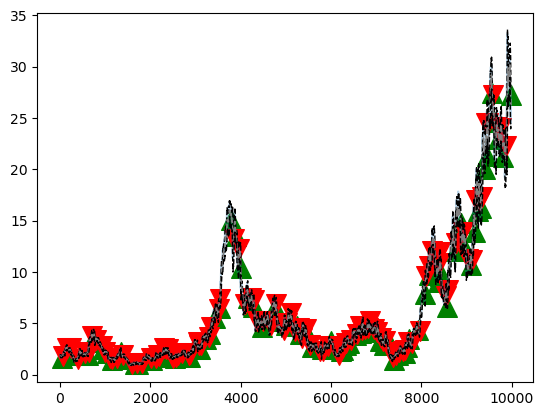

In [17]:
plt.plot(list_ClosingPriceSeries, label = 'CLOSE PRICES', alpha = 0.3)
plt.plot(list_upper_bb, label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.plot(list_sma_closingPrice, label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color ='grey')
plt.plot(list_lower_bb, label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df_data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df_data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)

In [18]:
len(buy_price), len(df_data)

(9981, 9981)

In [19]:
df_data["Buy_Price"] = buy_price
df_data["Sell_Price"] = sell_price

In [20]:
df_data

,Price,Mid_bb,Lower_bb,Upper_bb,Buy_Price,Sell_Price
19,1.858872,1.831510,1.698992,1.964029,NaN,NaN
20,1.936050,1.828313,1.710660,1.945966,NaN,NaN
21,1.894988,1.824291,1.723526,1.925055,NaN,NaN
22,1.860847,1.822819,1.725306,1.920332,NaN,NaN
23,1.794580,1.820835,1.722689,1.918980,NaN,NaN
...,...,...,...,...,...,...
9995,25.712797,26.984750,23.980548,29.988951,NaN,NaN
9996,26.141853,26.823048,24.019298,29.626797,NaN,NaN
9997,25.248690,26.577617,24.171643,28.983590,NaN,NaN
9998,25.371437,26.377698,24.307581,28.447816,NaN,NaN


In [21]:
df_data

,Price,Mid_bb,Lower_bb,Upper_bb,Buy_Price,Sell_Price
19,1.858872,1.831510,1.698992,1.964029,NaN,NaN
20,1.936050,1.828313,1.710660,1.945966,NaN,NaN
21,1.894988,1.824291,1.723526,1.925055,NaN,NaN
22,1.860847,1.822819,1.725306,1.920332,NaN,NaN
23,1.794580,1.820835,1.722689,1.918980,NaN,NaN
...,...,...,...,...,...,...
9995,25.712797,26.984750,23.980548,29.988951,NaN,NaN
9996,26.141853,26.823048,24.019298,29.626797,NaN,NaN
9997,25.248690,26.577617,24.171643,28.983590,NaN,NaN
9998,25.371437,26.377698,24.307581,28.447816,NaN,NaN


In [22]:
def get_macd_data(data, short_window=20, long_window=50, signal_window=12):
    """
    Get SMA, LMA, MACD, signal_line

    parameters
    -----------------------------
    short_window: short moving average size
    long_window: long moving average size
    signal_window: moving average size for signal line
    Output:
    Data frame with price, SMA, LMA, MACD, signal_line
    SMA: short moving average
    LMA: long moving average
    MACD: SMA - LMA
    signal_line: moving average of MACD
    """
    macd_data = data.copy()
    macd_data['SMA'] = macd_data['price'].rolling(window = short_window, min_periods=2,center=False).mean()
    macd_data['LMA'] = macd_data['price'].rolling(window = long_window, min_periods=2,center=False).mean()
    macd_data["MACD"] = macd_data['SMA'] - macd_data['LMA']
    macd_data['signal_line'] = macd_data['MACD'].rolling(window = signal_window, min_periods=2, center=False).mean()
    return macd_data

In [23]:
df_stock = df_data
df_stock['ema5'] = df_stock['Price'].ewm(span=5, adjust=False).mean()
df_stock['ema10'] = df_stock['Price'].ewm(span=10, adjust=False).mean()
df_stock['ema15'] = df_stock['Price'].ewm(span=15, adjust=False).mean()

df_stock['ema25'] = df_stock['Price'].ewm(span=25, adjust=False).mean()
df_stock['ema100'] = df_stock['Price'].ewm(span=100, adjust=False).mean()

df_stock['ema150'] = df_stock['Price'].ewm(span=150, adjust=False).mean()
df_stock['ema250'] = df_stock['Price'].ewm(span=250, adjust=False).mean()

df_stock['diff5_10'] = df_stock['ema5'] - df_stock['ema10']
df_stock['signal5_10'] = df_stock['diff5_10'].ewm(span=9, adjust=False).mean()

df_stock['diff5_15'] = df_stock['ema5'] - df_stock['ema15']
df_stock['signal5_15'] = df_stock['diff5_15'].ewm(span=9, adjust=False).mean()


df_stock['diff5_25'] = df_stock['ema5'] - df_stock['ema25']
df_stock['signal5_25'] = df_stock['diff5_25'].ewm(span=9, adjust=False).mean()

df_stock['diff25_100'] = df_stock['ema25'] - df_stock['ema100']
df_stock['signal25_100'] = df_stock['diff25_100'].ewm(span=9, adjust=False).mean()

df_stock['diff250_150'] = df_stock['ema150'] - df_stock['ema250']
df_stock['signal250_150'] = df_stock['diff250_150'].ewm(span=9, adjust=False).mean()

df_stock['sma'] = df_stock["Price"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(-10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Price"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

In [24]:
df_stock.reset_index(inplace = True)
df_stock

,index,Price,Mid_bb,Lower_bb,Upper_bb,Buy_Price,Sell_Price,ema5,ema10,ema15,...,diff5_25,signal5_25,diff25_100,signal25_100,diff250_150,signal250_150,sma,sma_shifted,signal,signal_sign
0,19,1.858872,1.831510,1.698992,1.964029,NaN,NaN,1.858872,1.858872,1.858872,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.804810,-0.054061,-1.0
1,20,1.936050,1.828313,1.710660,1.945966,NaN,NaN,1.884598,1.872904,1.868519,...,0.019789,0.003958,0.004409,0.000882,0.000407,0.000081,NaN,1.786444,-0.149607,-1.0
2,21,1.894988,1.824291,1.723526,1.925055,NaN,NaN,1.888061,1.876920,1.871828,...,0.020931,0.007353,0.006045,0.001914,0.000589,0.000183,NaN,1.768258,-0.126731,-1.0
3,22,1.860847,1.822819,1.725306,1.920332,NaN,NaN,1.878990,1.873997,1.870455,...,0.012343,0.008351,0.005567,0.002645,0.000587,0.000264,NaN,1.750086,-0.110761,-1.0
4,23,1.794580,1.820835,1.722689,1.918980,NaN,NaN,1.850853,1.859558,1.860971,...,-0.010250,0.004631,0.001340,0.002384,0.000235,0.000258,NaN,1.747231,-0.047348,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9976,9995,25.712797,26.984750,23.980548,29.988951,NaN,NaN,25.690708,26.034032,26.457480,...,-1.443388,-1.512620,-0.235269,0.231302,0.961976,1.011045,25.931489,NaN,NaN,NaN
9977,9996,26.141853,26.823048,24.019298,29.626797,NaN,NaN,25.841089,26.053636,26.418027,...,-1.216679,-1.453432,-0.287288,0.127584,0.951473,0.999131,25.897580,NaN,NaN,NaN
9978,9997,25.248690,26.577617,24.171643,28.983590,NaN,NaN,25.643623,25.907282,26.271860,...,-1.274986,-1.417743,-0.384936,0.025080,0.936379,0.986580,25.814377,NaN,NaN,NaN
9979,9998,25.371437,26.377698,24.307581,28.447816,NaN,NaN,25.552894,25.809856,26.159307,...,-1.246702,-1.383535,-0.465690,-0.073074,0.922151,0.973695,25.665044,NaN,NaN,NaN


In [25]:
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
df_stock.drop(df_stock.tail(10).index,inplace=True)
y = np.array(df_stock["signal_sign"])


# In[22]:


df_stock['sma'] = df_stock["Price"].rolling(window=10).mean()

df_stock['sma_shifted'] = df_stock['sma'].shift(-10)
df_stock['signal'] = df_stock['sma_shifted'] - df_stock["Price"]
df_stock['signal_sign'] = np.sign(df_stock['signal'])

In [26]:
len(df_stock)

9971

In [27]:
X = df_stock.drop(['signal_sign', 'sma_shifted', 'signal', 'sma', 'Buy_Price', 'Sell_Price'], axis=1).values
split = 0.5
n_index = int(len(df_stock)*split)
X_train = X[:n_index]
y_train = y[:n_index]

X_test = X[n_index:]
y_test = y[n_index:]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
clf1 = svm.SVC(kernel='linear') # Linear Kernel

clf = svm.SVC(gamma='auto') # Gaussian Kernel
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [29]:
print("Accuracy(Train):",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy(Test):",metrics.accuracy_score(y_test, y_pred_test))

Accuracy(Train): 0.9077231695085256
Accuracy(Test): 0.5142398716405937


In [30]:
y_pred_test

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [31]:
df_stock

,index,Price,Mid_bb,Lower_bb,Upper_bb,Buy_Price,Sell_Price,ema5,ema10,ema15,...,diff5_25,signal5_25,diff25_100,signal25_100,diff250_150,signal250_150,sma,sma_shifted,signal,signal_sign
0,19,1.858872,1.831510,1.698992,1.964029,NaN,NaN,1.858872,1.858872,1.858872,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.804810,-0.054061,-1.0
1,20,1.936050,1.828313,1.710660,1.945966,NaN,NaN,1.884598,1.872904,1.868519,...,0.019789,0.003958,0.004409,0.000882,0.000407,0.000081,NaN,1.786444,-0.149607,-1.0
2,21,1.894988,1.824291,1.723526,1.925055,NaN,NaN,1.888061,1.876920,1.871828,...,0.020931,0.007353,0.006045,0.001914,0.000589,0.000183,NaN,1.768258,-0.126731,-1.0
3,22,1.860847,1.822819,1.725306,1.920332,NaN,NaN,1.878990,1.873997,1.870455,...,0.012343,0.008351,0.005567,0.002645,0.000587,0.000264,NaN,1.750086,-0.110761,-1.0
4,23,1.794580,1.820835,1.722689,1.918980,NaN,NaN,1.850853,1.859558,1.860971,...,-0.010250,0.004631,0.001340,0.002384,0.000235,0.000258,NaN,1.747231,-0.047348,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9966,9985,27.066018,29.091321,26.128872,32.053769,NaN,NaN,27.331950,27.891246,28.306767,...,-1.380946,-0.937193,1.020292,1.492099,1.087857,1.100491,28.038010,NaN,NaN,NaN
9967,9986,26.480953,28.885395,25.794563,31.976226,NaN,NaN,27.048284,27.634829,28.078540,...,-1.492923,-1.048339,0.872597,1.368198,1.077566,1.095906,27.748516,NaN,NaN,NaN
9968,9987,26.080718,28.640432,25.472943,31.807920,NaN,NaN,26.725762,27.352263,27.828813,...,-1.626177,-1.163906,0.714772,1.237513,1.065267,1.089778,27.340856,NaN,NaN,NaN
9969,9988,26.864766,28.467283,25.309567,31.625000,NaN,NaN,26.772097,27.263627,27.708307,...,-1.465444,-1.224214,0.615669,1.113144,1.057253,1.083273,27.090353,NaN,NaN,NaN


In [32]:
df_test = df_stock[n_index:]

In [33]:
df_test["y"] = y_test

/tmp/ipykernel_31055/4163922017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["y"] = y_test


In [34]:
df_test.columns

Index(['index', 'Price', 'Mid_bb', 'Lower_bb', 'Upper_bb', 'Buy_Price',
       'Sell_Price', 'ema5', 'ema10', 'ema15', 'ema25', 'ema100', 'ema150',
       'ema250', 'diff5_10', 'signal5_10', 'diff5_15', 'signal5_15',
       'diff5_25', 'signal5_25', 'diff25_100', 'signal25_100', 'diff250_150',
       'signal250_150', 'sma', 'sma_shifted', 'signal', 'signal_sign', 'y'],
      dtype='object')

In [35]:
df_test["MLPrediction"] = y_pred_test

/tmp/ipykernel_31055/4083123696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["MLPrediction"] = y_pred_test


In [36]:
df_bb = df_test[["Price", "Buy_Price", "Sell_Price", "MLPrediction"]]

In [37]:
#df_bb[["Buy_Price", "Sell_Price"]].dropna(how="all")

In [38]:
df_bb.head(10)

,Price,Buy_Price,Sell_Price,MLPrediction
4985,4.968480,NaN,NaN,-1.0
4986,4.909927,NaN,NaN,-1.0
4987,5.016455,NaN,NaN,-1.0
4988,4.948503,NaN,NaN,-1.0
4989,4.957185,NaN,NaN,-1.0
4990,4.821722,NaN,NaN,-1.0
4991,4.680960,NaN,NaN,-1.0
4992,4.512636,NaN,NaN,-1.0
4993,4.648918,NaN,NaN,1.0
4994,4.693716,NaN,NaN,1.0


In [39]:
df_bb["Buy_Price"] = df_bb["Buy_Price"].fillna(method='ffill')

/tmp/ipykernel_31055/3823194505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bb["Buy_Price"] = df_bb["Buy_Price"].fillna(method='ffill')


In [40]:
df_bb.dropna(how="any")

,Price,Buy_Price,Sell_Price,MLPrediction
5083,5.968925,5.370613,5.968925,1.0
5181,4.246298,5.330889,4.246298,1.0
5266,4.533121,4.690759,4.533121,1.0
5337,3.617100,3.920731,3.617100,1.0
5422,4.455568,4.534628,4.455568,1.0
5518,2.842778,3.935940,2.842778,1.0
5725,2.339493,2.657086,2.339493,1.0
5801,2.257540,2.498174,2.257540,1.0
5905,2.809477,2.584098,2.809477,1.0
6156,1.937783,3.240667,1.937783,1.0
